# Disease Prediction Using Machine Learning

This notebook implements a predictive analytics model for early disease detection using a healthcare dataset. It includes preprocessing, EDA, model training, and evaluation.

In [1]:
# Step 1: Install Required Libraries
!pip install seaborn scikit-learn


In [2]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Step 3: Upload Dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving healthcare_dataset.csv to healthcare_dataset.csv


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
# @title Date of Admission vs Age

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Admission']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date of Admission', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Admission')
_ = plt.ylabel('Age')

In [4]:
# Step 4: Data Preprocessing

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Fill or drop missing values based on strategy
df = df.dropna()  # Or use df.fillna(method='ffill') if preferred

# Remove duplicates
df = df.drop_duplicates()

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Encode categorical variables if any
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


Missing values per column:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


               name           age        gender    blood_type  \
count  54966.000000  54966.000000  54966.000000  54966.000000   
mean   24991.842703     51.535185      0.500237      3.492013   
std    14430.654340     19.605661      0.500004      2.289690   
min        0.000000     13.000000      0.000000      0.000000   
25%    12493.250000     35.000000      0.000000      1.000000   
50%    24997.500000     52.000000      1.000000      3.000000   
75%    37462.750000     68.000000      1.000000      5.000000   
max    49991.000000     89.000000      1.000000      7.000000   

       medical_condition  date_of_admission        doctor      hospital  \
count       54966.000000       54966.000000  54966.000000  54966.000000   
mean            2.498945         908.732980  20187.797820  19662.619710   
std             1.708373         528.649807  11530.489517  11109.864699   
min             0.000000           0.000000      0.000000      0.000000   
25%             1.000000         447.00

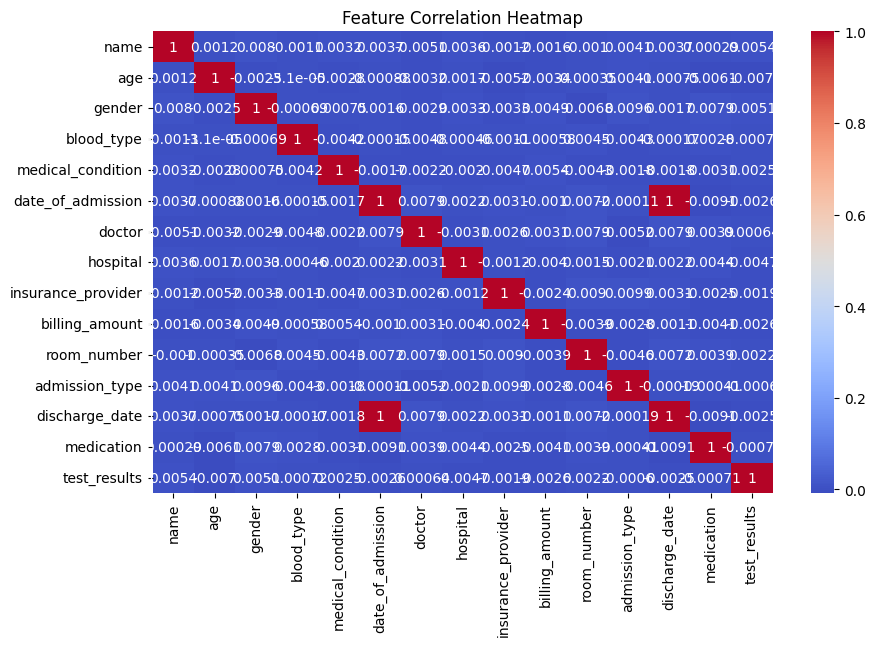

In [5]:
# Step 5: Exploratory Data Analysis (EDA)

# Basic statistics
print(df.describe())

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Step 6: Feature Selection and Splitting
target_column_name = 'disease'  # Replace 'disease' with the actual name
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Step 7: Model Building

# Using Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Step 8: Model Evaluation

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [10]:
# Step 9: Optional Deployment with Streamlit (code not run in Colab)
# Save the model (if needed)
import joblib
joblib.dump(model, "disease_model.pkl")

print("Model saved. You can deploy it using Streamlit or Flask.")


Model saved. You can deploy it using Streamlit or Flask.
